# Import libraries

In [91]:
# Load the required packages
import numpy as np
import pandas as pd
from pandas import DataFrame
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Activation
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.optimizers import RMSprop, adam
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from time import time
import matplotlib
import matplotlib.pyplot as plt
import os #manage files
os.chdir('C:\\Users\\A4 Dell\\Desktop\\Northwestern University\\Practical Machine Learning\\week6')

# Read in data and prepare data

In [47]:
train = pd.read_csv('train.csv') #read in train data
test = pd.read_csv('test.csv') #read in test data
print(len(train))
print(len(test))

42000
28000


In [48]:
y_train = train["label"]
X_train = train.drop('label', 1)  #drop label variable
print(X_train.shape)     #dataframe size
X_train.head()

(42000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Exploratory data analysis

In [49]:
y_train.value_counts()   #check the frequency distribution of y (0-9 possible categories)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

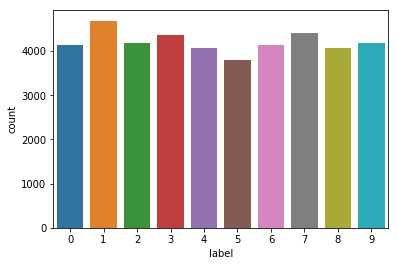

In [50]:
import seaborn as sns
sns.countplot(y_train)  

In [51]:
#check the predictors
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [52]:
X_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [56]:
X_train = MinMaxScaler().fit_transform(X_train)   #standardize the data

y_train_onehot = to_categorical(y_train, num_classes=10)  #encode labels to one hot vectors

C:\Users\A4 Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [57]:
y_train_onehot

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [58]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
test = MinMaxScaler().fit_transform(test)   #standardize the test data

C:\Users\A4 Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Split the raw training data into train and validation sets

In [61]:
# Set the random seed
random_seed = 2

# Split the train and the validation set for the fitting
X_train, X_val, y_train_onehot, y_val_onehot = train_test_split(X_train, y_train_onehot, test_size = 0.1, random_state=random_seed)

# 1-Layer Neural Network using Keras

In [64]:
start = time()

model = Sequential()
model.add(Dense(10,  activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#train the model
history = model.fit(X_train, y_train_onehot, epochs=10, validation_data = (X_val, y_val_onehot), verbose = 2)

print ('\ntime taken %s seconds' % str(time() - start))

scores = model.evaluate(X_train, y_train_onehot)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100), "for traininig set")

scores_val = model.evaluate(X_val, y_val_onehot)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores_val[1]*100), "for validation set")


Train on 37800 samples, validate on 4200 samples
Epoch 1/10
 - 3s - loss: 0.5393 - acc: 0.8616 - val_loss: 0.3400 - val_acc: 0.9052
Epoch 2/10
 - 2s - loss: 0.3202 - acc: 0.9111 - val_loss: 0.3001 - val_acc: 0.9155
Epoch 3/10
 - 2s - loss: 0.2913 - acc: 0.9190 - val_loss: 0.2860 - val_acc: 0.9169
Epoch 4/10
 - 2s - loss: 0.2765 - acc: 0.9223 - val_loss: 0.2815 - val_acc: 0.9181
Epoch 5/10
 - 2s - loss: 0.2671 - acc: 0.9260 - val_loss: 0.2763 - val_acc: 0.9195
Epoch 6/10
 - 2s - loss: 0.2602 - acc: 0.9276 - val_loss: 0.2726 - val_acc: 0.9193
Epoch 7/10
 - 2s - loss: 0.2555 - acc: 0.9278 - val_loss: 0.2759 - val_acc: 0.9186
Epoch 8/10
 - 2s - loss: 0.2506 - acc: 0.9293 - val_loss: 0.2721 - val_acc: 0.9190
Epoch 9/10
 - 3s - loss: 0.2476 - acc: 0.9301 - val_loss: 0.2732 - val_acc: 0.9212
Epoch 10/10
 - 2s - loss: 0.2438 - acc: 0.9316 - val_loss: 0.2710 - val_acc: 0.9200

time taken 25.153005599975586 seconds
37800/37800 [==============================] - 1s 23us/step

acc: 93.43%
4200/420

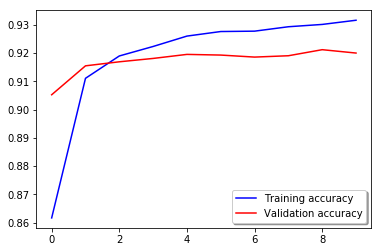

In [76]:
# Plot the accuracy curves for training and validation 
plt.plot(history.history['acc'], color='b', label="Training accuracy")
plt.plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = plt.legend(loc='best', shadow=True)

In [77]:
#get the preditions on test data, then create Kaggle submission file 1
predictions = model.predict(test)

# select the index with the maximum probability
predictions = np.argmax(predictions,axis = 1)

pd.DataFrame({"ImageId":list(range(1,len(predictions)+1)),
                 "Label":predictions}).to_csv("cnn_kaggle_submission1.csv", index=False, header=True)

# Kaggle Score: 0.92228

# 2-Layer with 10 Nodes Neural Network

In [78]:
start = time()

model = Sequential()
model.add(Dense(input_dim=784, output_dim=10, activation='relu'))
model.add(Dense(output_dim=10,  activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#train the model
history = model.fit(X_train, y_train_onehot, epochs=10, validation_data = (X_val, y_val_onehot), verbose = 2)

print ('\ntime taken %s seconds' % str(time() - start))

scores = model.evaluate(X_train, y_train_onehot)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100), "for traininig set")

scores_val = model.evaluate(X_val, y_val_onehot)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores_val[1]*100), "for validation set")

C:\Users\A4 Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="relu", units=10)`
  after removing the cwd from sys.path.
C:\Users\A4 Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  """


Train on 37800 samples, validate on 4200 samples
Epoch 1/10
 - 3s - loss: 0.6060 - acc: 0.8270 - val_loss: 0.3494 - val_acc: 0.8964
Epoch 2/10
 - 3s - loss: 0.3137 - acc: 0.9112 - val_loss: 0.2981 - val_acc: 0.9160
Epoch 3/10
 - 3s - loss: 0.2810 - acc: 0.9212 - val_loss: 0.2957 - val_acc: 0.9164
Epoch 4/10
 - 3s - loss: 0.2655 - acc: 0.9245 - val_loss: 0.2760 - val_acc: 0.9245
Epoch 5/10
 - 3s - loss: 0.2546 - acc: 0.9279 - val_loss: 0.2778 - val_acc: 0.9260
Epoch 6/10
 - 3s - loss: 0.2468 - acc: 0.9305 - val_loss: 0.2772 - val_acc: 0.9229
Epoch 7/10
 - 3s - loss: 0.2385 - acc: 0.9315 - val_loss: 0.2664 - val_acc: 0.9276
Epoch 8/10
 - 3s - loss: 0.2324 - acc: 0.9342 - val_loss: 0.2671 - val_acc: 0.9255
Epoch 9/10
 - 3s - loss: 0.2263 - acc: 0.9358 - val_loss: 0.2724 - val_acc: 0.9226
Epoch 10/10
 - 3s - loss: 0.2218 - acc: 0.9371 - val_loss: 0.2611 - val_acc: 0.9276

time taken 26.903274536132812 seconds
37800/37800 [==============================] - 1s 26us/step

acc: 94.24% for trai

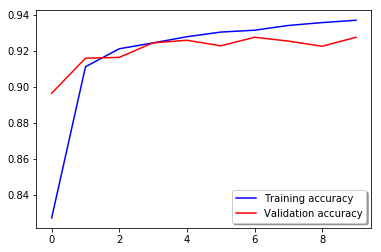

In [79]:
# Plot the accuracy curves for training and validation 
plt.plot(history.history['acc'], color='b', label="Training accuracy")
plt.plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = plt.legend(loc='best', shadow=True)

In [80]:
#get the preditions on test data, then create Kaggle submission file 1
predictions = model.predict(test)

# select the indix with the maximum probability
predictions = np.argmax(predictions,axis = 1)

pd.DataFrame({"ImageId":list(range(1,len(predictions)+1)),
                 "Label":predictions}).to_csv("cnn_kaggle_submission2_10nodes.csv", index=False, header=True)

# Kaggle Score: 0.92385

# 2-Layer & 20 Nodes Neural Network

In [81]:
start = time()

model = Sequential()
model.add(Dense(input_dim=784, output_dim=20, activation='relu'))
model.add(Dense(output_dim=10,  activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#train the model
history = model.fit(X_train, y_train_onehot, epochs=10, validation_data = (X_val, y_val_onehot), verbose = 2)

print ('\ntime taken %s seconds' % str(time() - start))

scores = model.evaluate(X_train, y_train_onehot)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100), "for traininig set")

scores_val = model.evaluate(X_val, y_val_onehot)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores_val[1]*100), "for validation set")

C:\Users\A4 Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="relu", units=20)`
  after removing the cwd from sys.path.
C:\Users\A4 Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  """


Train on 37800 samples, validate on 4200 samples
Epoch 1/10
 - 3s - loss: 0.4650 - acc: 0.8708 - val_loss: 0.2823 - val_acc: 0.9186
Epoch 2/10
 - 3s - loss: 0.2511 - acc: 0.9286 - val_loss: 0.2428 - val_acc: 0.9307
Epoch 3/10
 - 3s - loss: 0.2079 - acc: 0.9401 - val_loss: 0.2083 - val_acc: 0.9381
Epoch 4/10
 - 3s - loss: 0.1790 - acc: 0.9488 - val_loss: 0.2008 - val_acc: 0.9431
Epoch 5/10
 - 3s - loss: 0.1589 - acc: 0.9540 - val_loss: 0.1781 - val_acc: 0.9486
Epoch 6/10
 - 3s - loss: 0.1444 - acc: 0.9572 - val_loss: 0.1827 - val_acc: 0.9483
Epoch 7/10
 - 3s - loss: 0.1340 - acc: 0.9603 - val_loss: 0.1704 - val_acc: 0.9529
Epoch 8/10
 - 3s - loss: 0.1239 - acc: 0.9634 - val_loss: 0.1617 - val_acc: 0.9548
Epoch 9/10
 - 3s - loss: 0.1166 - acc: 0.9652 - val_loss: 0.1751 - val_acc: 0.9488
Epoch 10/10
 - 3s - loss: 0.1097 - acc: 0.9679 - val_loss: 0.1670 - val_acc: 0.9519

time taken 27.97347092628479 seconds
37800/37800 [==============================] - 1s 28us/step

acc: 97.21% for train

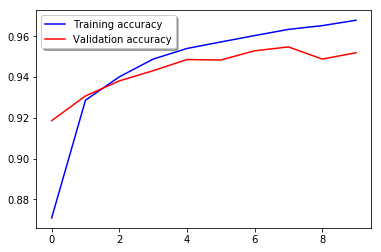

In [82]:
# Plot the accuracy curves for training and validation 
plt.plot(history.history['acc'], color='b', label="Training accuracy")
plt.plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = plt.legend(loc='best', shadow=True)

In [83]:
#get the preditions on test data, then create Kaggle submission file 1
predictions = model.predict(test)

# select the indix with the maximum probability
predictions = np.argmax(predictions,axis = 1)

pd.DataFrame({"ImageId":list(range(1,len(predictions)+1)),
                 "Label":predictions}).to_csv("cnn_kaggle_submission2_20nodes.csv", index=False, header=True)

# Kaggle Score: 0.95257

# 5-Layer with 10 nodes Neural Network

In [84]:
start = time()

model = Sequential()
model.add(Dense(input_dim=784, output_dim=10, activation='relu'))
model.add(Dense(output_dim=10, activation='relu'))
model.add(Dense(output_dim=20, activation='relu'))
#model.add(Dropout(0.25))
model.add(Dense(output_dim=10, activation='relu'))
model.add(Dense(output_dim=10,  activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#train the model
history = model.fit(X_train, y_train_onehot, epochs=10, validation_data = (X_val, y_val_onehot), verbose = 2)

print ('\ntime taken %s seconds' % str(time() - start))

scores = model.evaluate(X_train, y_train_onehot)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100), "for traininig set")

scores_val = model.evaluate(X_val, y_val_onehot)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores_val[1]*100), "for validation set")

C:\Users\A4 Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="relu", units=10)`
  after removing the cwd from sys.path.
C:\Users\A4 Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=10)`
  """
C:\Users\A4 Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20)`
  
C:\Users\A4 Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=10)`
  
C:\Users\A4 Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  if __name__ == '__main__':


Train on 37800 samples, validate on 4200 samples
Epoch 1/10
 - 4s - loss: 0.8821 - acc: 0.7034 - val_loss: 0.4076 - val_acc: 0.8864
Epoch 2/10
 - 3s - loss: 0.3714 - acc: 0.8944 - val_loss: 0.3479 - val_acc: 0.9040
Epoch 3/10
 - 3s - loss: 0.3187 - acc: 0.9087 - val_loss: 0.3087 - val_acc: 0.9093
Epoch 4/10
 - 3s - loss: 0.2904 - acc: 0.9157 - val_loss: 0.2859 - val_acc: 0.9169
Epoch 5/10
 - 3s - loss: 0.2679 - acc: 0.9206 - val_loss: 0.2810 - val_acc: 0.9229
Epoch 6/10
 - 3s - loss: 0.2481 - acc: 0.9252 - val_loss: 0.2733 - val_acc: 0.9262
Epoch 7/10
 - 3s - loss: 0.2360 - acc: 0.9306 - val_loss: 0.2593 - val_acc: 0.9260
Epoch 8/10
 - 3s - loss: 0.2224 - acc: 0.9339 - val_loss: 0.2779 - val_acc: 0.9193
Epoch 9/10
 - 3s - loss: 0.2145 - acc: 0.9359 - val_loss: 0.2383 - val_acc: 0.9290
Epoch 10/10
 - 3s - loss: 0.2069 - acc: 0.9390 - val_loss: 0.2422 - val_acc: 0.9314

time taken 32.8346905708313 seconds
37800/37800 [==============================] - 1s 31us/step

acc: 94.38% for traini

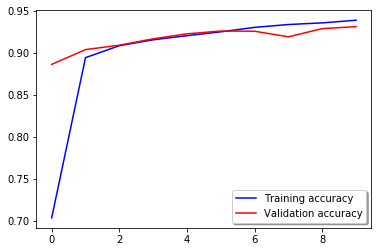

In [85]:
# Plot the accuracy curves for training and validation 
plt.plot(history.history['acc'], color='b', label="Training accuracy")
plt.plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = plt.legend(loc='best', shadow=True)

In [86]:
#get the preditions on test data, then create Kaggle submission file 1
predictions = model.predict(test)

# select the index with the maximum probability
predictions = np.argmax(predictions,axis = 1)

pd.DataFrame({"ImageId":list(range(1,len(predictions)+1)),
                 "Label":predictions}).to_csv("cnn_kaggle_submission3_10nodes.csv", index=False, header=True)

# Kaggle Score: 0.92842

# 5-Layer with 20 nodes Neural Network

In [87]:
start = time()

model = Sequential()
model.add(Dense(input_dim=784, output_dim=20, activation='relu'))
model.add(Dense(output_dim=20, activation='relu'))
model.add(Dense(output_dim=20, activation='relu'))
#model.add(Dropout(0.25))
model.add(Dense(output_dim=20, activation='relu'))
model.add(Dense(output_dim=10,  activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#train the model
history = model.fit(X_train, y_train_onehot, epochs=10, validation_data = (X_val, y_val_onehot), verbose = 2)

print ('\ntime taken %s seconds' % str(time() - start))

scores = model.evaluate(X_train, y_train_onehot)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100), "for traininig set")

scores_val = model.evaluate(X_val, y_val_onehot)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores_val[1]*100), "for validation set")

C:\Users\A4 Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="relu", units=20)`
  after removing the cwd from sys.path.
C:\Users\A4 Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20)`
  """
C:\Users\A4 Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20)`
  
C:\Users\A4 Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20)`
  
C:\Users\A4 Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  if __name__ == '__main__':


Train on 37800 samples, validate on 4200 samples
Epoch 1/10
 - 5s - loss: 0.5066 - acc: 0.8455 - val_loss: 0.2955 - val_acc: 0.9167
Epoch 2/10
 - 3s - loss: 0.2534 - acc: 0.9261 - val_loss: 0.2342 - val_acc: 0.9317
Epoch 3/10
 - 3s - loss: 0.2042 - acc: 0.9385 - val_loss: 0.2289 - val_acc: 0.9348
Epoch 4/10
 - 3s - loss: 0.1774 - acc: 0.9462 - val_loss: 0.2037 - val_acc: 0.9414
Epoch 5/10
 - 3s - loss: 0.1559 - acc: 0.9529 - val_loss: 0.1842 - val_acc: 0.9476
Epoch 6/10
 - 3s - loss: 0.1416 - acc: 0.9558 - val_loss: 0.1768 - val_acc: 0.9474
Epoch 7/10
 - 3s - loss: 0.1304 - acc: 0.9592 - val_loss: 0.2077 - val_acc: 0.9386
Epoch 8/10
 - 3s - loss: 0.1229 - acc: 0.9622 - val_loss: 0.1811 - val_acc: 0.9481
Epoch 9/10
 - 3s - loss: 0.1151 - acc: 0.9650 - val_loss: 0.1901 - val_acc: 0.9460
Epoch 10/10
 - 3s - loss: 0.1100 - acc: 0.9658 - val_loss: 0.1914 - val_acc: 0.9467

time taken 35.35546350479126 seconds
37800/37800 [==============================] - 1s 33us/step

acc: 96.77% for train

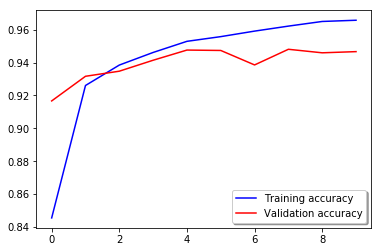

In [88]:
# Plot the accuracy curves for training and validation 
plt.plot(history.history['acc'], color='b', label="Training accuracy")
plt.plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = plt.legend(loc='best', shadow=True)

In [89]:
#get the preditions on test data, then create Kaggle submission file 1
predictions = model.predict(test)

# select the indix with the maximum probability
predictions = np.argmax(predictions,axis = 1)

pd.DataFrame({"ImageId":list(range(1,len(predictions)+1)),
                 "Label":predictions}).to_csv("cnn_kaggle_submission3_20nodes.csv", index=False, header=True)

# Kaggle Score: 0.4428

In [90]:
history.history

{'val_loss': [0.29553433043616156,
  0.23415348790940785,
  0.22890126307805378,
  0.20366628503515607,
  0.18415510488407952,
  0.1768090179988316,
  0.20771997050160454,
  0.18109673082828523,
  0.1901337196926276,
  0.19137049748784019],
 'val_acc': [0.9166666666666666,
  0.9316666666666666,
  0.9347619047619048,
  0.9414285714285714,
  0.9476190476190476,
  0.9473809523809524,
  0.9385714285714286,
  0.9480952380952381,
  0.945952380952381,
  0.9466666666666667],
 'loss': [0.5066099215941454,
  0.2533964672621596,
  0.20424088836366694,
  0.17736530279001547,
  0.15594970183279463,
  0.14163249991913004,
  0.1303503182601361,
  0.12285775352289122,
  0.11509465911952907,
  0.10998697279306946],
 'acc': [0.8454761904761905,
  0.926058201058201,
  0.9384920634920635,
  0.9461640211640212,
  0.952936507936508,
  0.9557936507936508,
  0.9591534391534392,
  0.9621957671957672,
  0.965026455026455,
  0.9657671957671957]}